In [ ]:
!pip uninstall opencv-python opencv-contrib-python

Found existing installation: opencv-python 4.11.0.86
Uninstalling opencv-python-4.11.0.86:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/cv2/*
    /usr/local/lib/python3.11/dist-packages/opencv_python-4.11.0.86.dist-info/*
    /usr/local/lib/python3.11/dist-packages/opencv_python.libs/libQt5Core-e7f476e2.so.5.15.16
    /usr/local/lib/python3.11/dist-packages/opencv_python.libs/libQt5Gui-1ce8cbfe.so.5.15.16
    /usr/local/lib/python3.11/dist-packages/opencv_python.libs/libQt5Test-9ac3ed15.so.5.15.16
    /usr/local/lib/python3.11/dist-packages/opencv_python.libs/libQt5Widgets-cd430389.so.5.15.16
    /usr/local/lib/python3.11/dist-packages/opencv_python.libs/libQt5XcbQpa-b18b5a78.so.5.15.16
    /usr/local/lib/python3.11/dist-packages/opencv_python.libs/libX11-xcb-0e257303.so.1.0.0
    /usr/local/lib/python3.11/dist-packages/opencv_python.libs/libXau-00ec42fe.so.6.0.0
    /usr/local/lib/python3.11/dist-packages/opencv_python.libs/libavcodec-76c43bf0.so.59.37.100
    /usr/loca

In [ ]:
!pip install opencv-contrib-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 MB 10.8 MB/s eta 0:00:00


# **Task-1: Blob Detection and Image Quality Enhancement**

### **Blob Detection Techniques**

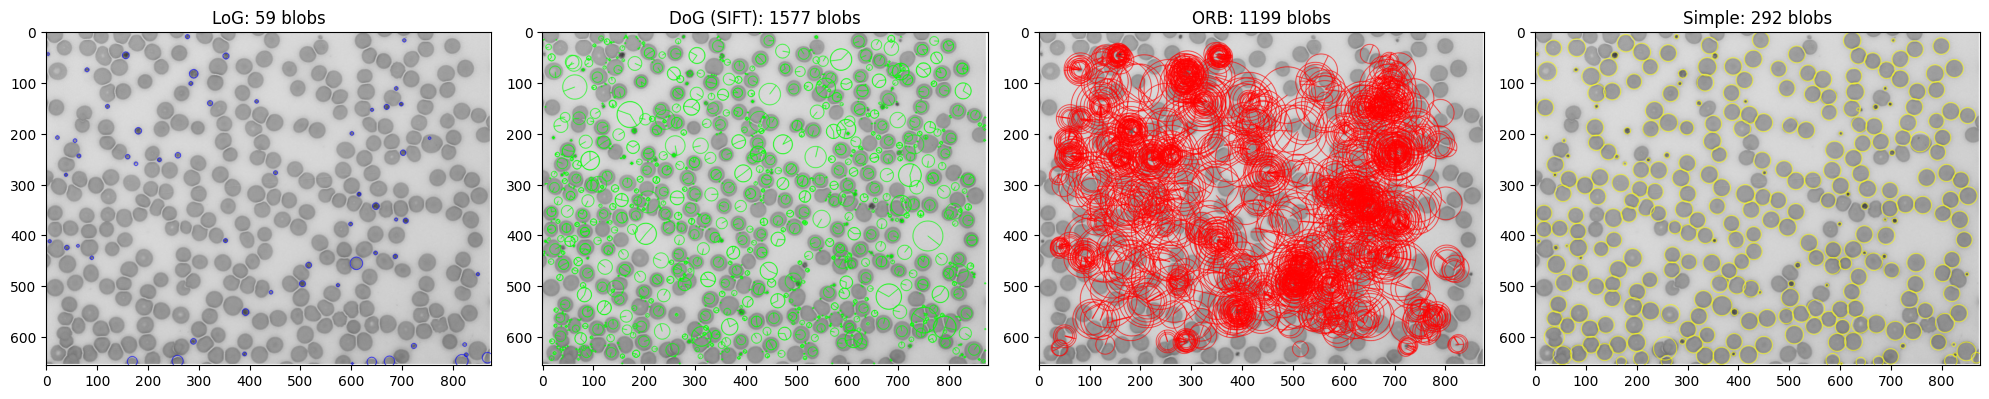

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_blobs(image_path,
                 log_params=None,
                 dog_params=None,
                 doh_params=None,
                 simple_params=None):
    # Read image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Initialize default parameters if not provided
    if log_params is None:
        log_params = cv2.SimpleBlobDetector_Params()
        log_params.filterByArea = True
        log_params.minArea = 10
        log_params.maxArea = 500

    if simple_params is None:
        simple_params = cv2.SimpleBlobDetector_Params()
        simple_params.filterByColor = True
        simple_params.blobColor = 0
        simple_params.filterByArea = True
        simple_params.minArea = 10

    # LoG (Laplacian of Gaussian)
    detector_log = cv2.SimpleBlobDetector_create(log_params)
    keypoints_log = detector_log.detect(img)

    # DoG (Difference of Gaussian) - using SIFT
    if dog_params is None:
        dog_params = {'nfeatures': 0, 'nOctaveLayers': 3, 'contrastThreshold': 0.04}
    sift = cv2.SIFT_create(**dog_params)
    keypoints_dog = sift.detect(img, None)

    # DoH alternative using ORB
    if doh_params is None:
        doh_params = {'nfeatures': 1500, 'scaleFactor': 1.2}
    orb = cv2.ORB_create(**doh_params)
    keypoints_doh = orb.detect(img, None)

    # Simple Blob Detector
    detector_simple = cv2.SimpleBlobDetector_create(simple_params)
    keypoints_simple = detector_simple.detect(img)

    # Draw keypoints
    img_log = cv2.drawKeypoints(img, keypoints_log, np.array([]), (0,0,255),
                              cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    img_dog = cv2.drawKeypoints(img, keypoints_dog, np.array([]), (0,255,0),
                              cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    img_doh = cv2.drawKeypoints(img, keypoints_doh, np.array([]), (255,0,0),
                              cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    img_simple = cv2.drawKeypoints(img, keypoints_simple, np.array([]), (255,255,0),
                                 cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    # Display results
    plt.figure(figsize=(20,5))
    plt.subplot(141), plt.imshow(img_log), plt.title(f'LoG: {len(keypoints_log)} blobs')
    plt.subplot(142), plt.imshow(img_dog), plt.title(f'DoG (SIFT): {len(keypoints_dog)} blobs')
    plt.subplot(143), plt.imshow(img_doh), plt.title(f'ORB: {len(keypoints_doh)} blobs')
    plt.subplot(144), plt.imshow(img_simple), plt.title(f'Simple: {len(keypoints_simple)} blobs')
    plt.tight_layout()
    plt.show()

# Example usage
detect_blobs('microscope_image.jpg')

### **Image Quality Enhancement**

/usr/local/lib/python3.11/dist-packages/skimage/_shared/utils.py:445: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


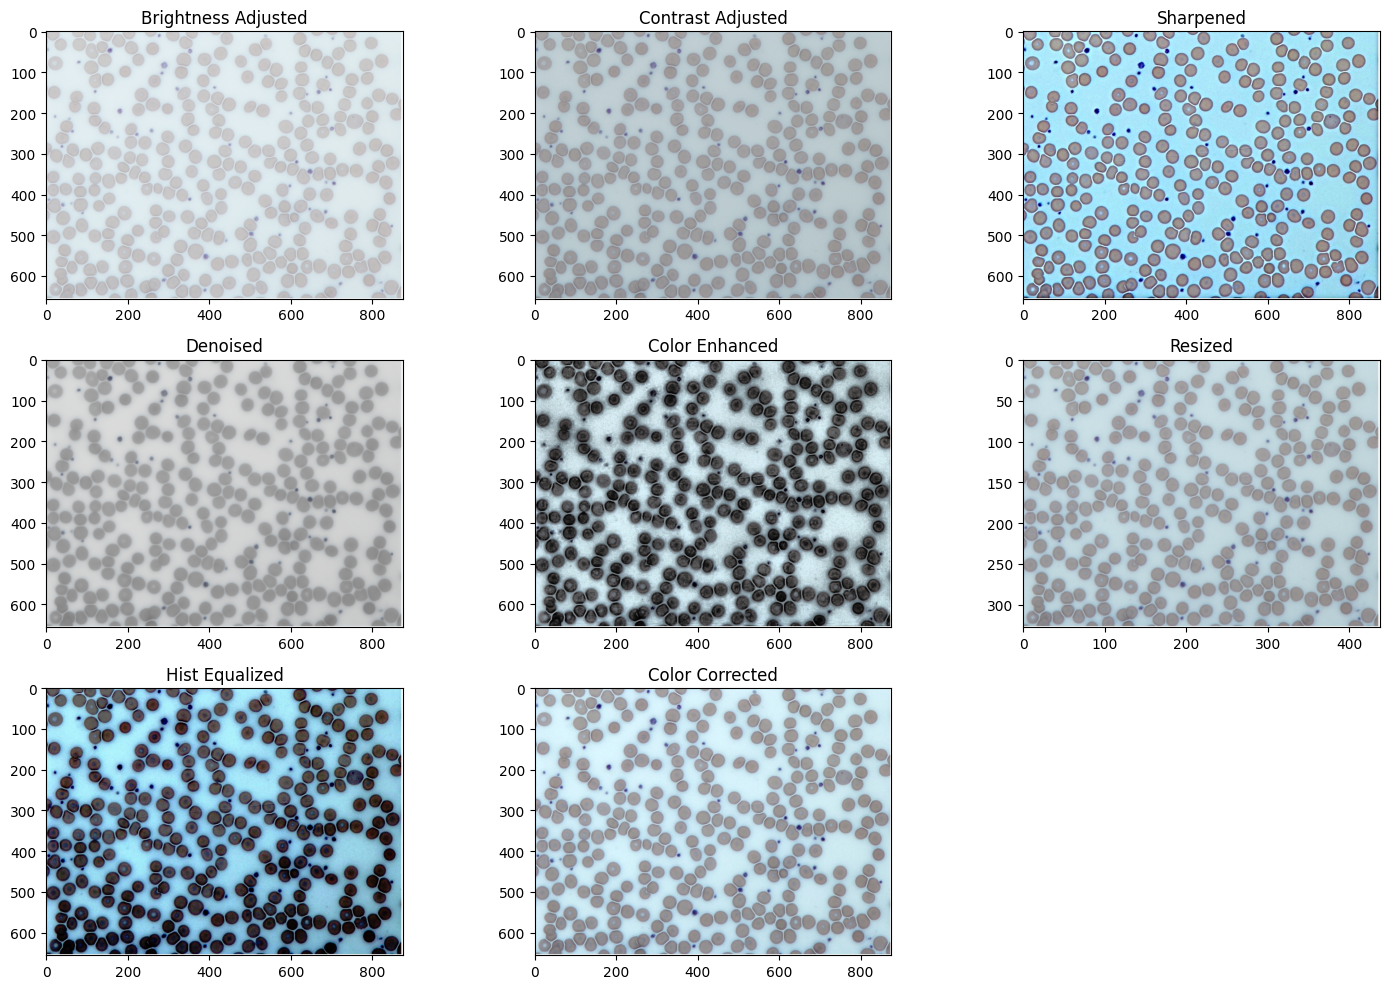

In [ ]:
from skimage import io, filters, exposure, restoration, transform
from scipy import ndimage

def enhance_image(image_path):
    # Read image
    img = io.imread(image_path)

    # 1. Adjust brightness and contrast
    img_bright = exposure.adjust_gamma(img, gamma=0.5)
    img_contrast = exposure.adjust_log(img, gain=0.9)

    # 2. Sharpening
    img_sharp = filters.unsharp_mask(img, radius=5, amount=2)

    # 3. Noise removal
    img_denoise = restoration.denoise_tv_chambolle(img, weight=0.1)

    # 4. Color enhancement
    img_color = exposure.equalize_adapthist(img, clip_limit=0.03)

    # 5. Resizing
    img_resized = transform.resize(img, (img.shape[0]//2, img.shape[1]//2))

    # 6. Histogram equalization
    img_eq = exposure.equalize_hist(img)

    # 7. Color correction (white balance)
    img_wb = exposure.rescale_intensity(img, in_range=(img.min(), img.max()*0.9))

    # Display results
    plt.figure(figsize=(15,10))
    plt.subplot(331), plt.imshow(img_bright), plt.title('Brightness Adjusted')
    plt.subplot(332), plt.imshow(img_contrast), plt.title('Contrast Adjusted')
    plt.subplot(333), plt.imshow(img_sharp), plt.title('Sharpened')
    plt.subplot(334), plt.imshow(img_denoise), plt.title('Denoised')
    plt.subplot(335), plt.imshow(img_color), plt.title('Color Enhanced')
    plt.subplot(336), plt.imshow(img_resized), plt.title('Resized')
    plt.subplot(337), plt.imshow(img_eq), plt.title('Hist Equalized')
    plt.subplot(338), plt.imshow(img_wb), plt.title('Color Corrected')
    plt.tight_layout()
    plt.show()

enhance_image('microscope_image.jpg')

# **Task-2: Image Classification using AlexNet and VGG16 on CIFAR-100**

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import time
from torchvision import models

In [ ]:
# Step 2: Load the dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize for AlexNet and VGG
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR100(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                         shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR100(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=128,
                                        shuffle=False, num_workers=2)

classes = trainset.classes
super_classes = trainset.class_to_idx  # Simplified - actual superclasses would need mapping

100%|██████████| 169M/169M [00:03<00:00, 43.5MB/s]


In [ ]:
# Step 3: Load pretrained models and modify for CIFAR-100
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def get_model(model_name):
    if model_name == 'alexnet':
        model = models.alexnet(pretrained=True)
        # Modify last layer for CIFAR-100
        model.classifier[6] = nn.Linear(4096, 100)
    elif model_name == 'vgg16':
        model = models.vgg16(pretrained=True)
        # Modify last layer for CIFAR-100
        model.classifier[6] = nn.Linear(4096, 100)
    return model.to(device)

In [ ]:
# Step 4: Train the models
def train_model(model, name, epochs=5):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

    print(f"Training {name}...")
    start_time = time.time()

    for epoch in range(epochs):
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data[0].to(device), data[1].to(device)

            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            if i % 100 == 99:
                print(f'[{epoch + 1}, {i + 1}] loss: {running_loss / 100:.3f}')
                running_loss = 0.0

    training_time = time.time() - start_time
    print(f'Finished Training {name} in {training_time:.2f} seconds')
    return model, training_time

In [ ]:
# Step 5: Evaluate the models
def evaluate_model(model, name):
    correct = 0
    total = 0
    start_time = time.time()

    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    inference_time = time.time() - start_time
    accuracy = 100 * correct / total
    print(f'Accuracy of {name} on test images: {accuracy:.2f}%')
    print(f'Inference time: {inference_time:.2f} seconds')
    return accuracy, inference_time

In [ ]:
# Main execution
if __name__ == '__main__':
    # Train and evaluate AlexNet
    alexnet = get_model('alexnet')
    alexnet, alexnet_time = train_model(alexnet, 'AlexNet', epochs=5)
    alexnet_acc, alexnet_inf = evaluate_model(alexnet, 'AlexNet')

    # Train and evaluate VGG16
    vgg16 = get_model('vgg16')
    vgg16, vgg16_time = train_model(vgg16, 'VGG16', epochs=5)
    vgg16_acc, vgg16_inf = evaluate_model(vgg16, 'VGG16')

    # Step 6: Compare the results
    print("\nComparison:")
    print(f"{'Metric':<15}{'AlexNet':<10}{'VGG16':<10}")
    print(f"{'Training Time':<15}{alexnet_time:<10.2f}{vgg16_time:<10.2f}")
    print(f"{'Accuracy':<15}{alexnet_acc:<10.2f}{vgg16_acc:<10.2f}")
    print(f"{'Inference Time':<15}{alexnet_inf:<10.2f}{vgg16_inf:<10.2f}")

Training AlexNet...
[1, 100] loss: 3.653
[1, 200] loss: 2.199
[1, 300] loss: 1.921
[2, 100] loss: 1.535
[2, 200] loss: 1.476
[2, 300] loss: 1.415
[3, 100] loss: 1.262
[3, 200] loss: 1.263
[3, 300] loss: 1.212
[4, 100] loss: 1.085
[4, 200] loss: 1.124
[4, 300] loss: 1.084
[5, 100] loss: 0.987
[5, 200] loss: 0.995
[5, 300] loss: 0.999
Finished Training AlexNet in 457.29 seconds
Accuracy of AlexNet on test images: 65.27%
Inference time: 17.03 seconds


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:07<00:00, 75.9MB/s]


Training VGG16...
[1, 100] loss: 3.985
[1, 200] loss: 2.127
[1, 300] loss: 1.654
[2, 100] loss: 1.266
[2, 200] loss: 1.221
[2, 300] loss: 1.192
[3, 100] loss: 0.969
[3, 200] loss: 0.969
[3, 300] loss: 0.972


KeyboardInterrupt: 